# 1. Data collection

In [1]:
# Importing required libraries

import pandas as pd  # (v 1.2.4)
import time
import isodate  # pip install isodate (v. 0.6.0)
from tqdm import tqdm as tq  # (v. 4.59.0)
import matplotlib.pyplot as plt  # (v 3.3.4)
from googleapiclient.discovery import build  # (v 2.7.0)
pd.set_option('display.max_colwidth', 300)

In [2]:
# Reading the youtube video dataset source
link = 'https://raw.githubusercontent.com/jonatasaguiar/AIML_program/master/social_media_analytics/dataset/vdoLinks.csv'
df = pd.read_csv(link)
df

,youtubeId,movieId,title
0,K26_sDKnvMU,1,Toy Story (1995)
1,3LPANjHlPxo,2,Jumanji (1995)
2,rEnOoWs3FuA,3,Grumpier Old Men (1995)
3,j9xml1CxgXI,4,Waiting to Exhale (1995)
4,ltwvKLnj1B4,5,Father of the Bride Part II (1995)
...,...,...,...
25618,-oB6DN5dYWo,131252,Forklift Driver Klaus: The First Day on the Job (2001)
25619,DK7KQ-gEdl4,131256,"Feuer, Eis & Dosenbier (2002)"
25620,v29P-wchMZQ,131258,The Pirates (2014)
25621,dAz-nZ65jYU,131260,Rentun Ruusu (2001)


In [4]:
# Set your api key 

api_key = [ api_key_1, api_key_2]

In [ ]:
# Feching YouTube videos

youtube = build('youtube', 'v3', developerKey=api_keys[2])

videos_not_fetched = list()

video_id_list = list()
video_description_list = list()
view_count_list = list()
like_count_list = list()
dislike_count_list = list()
comment_count_list = list()
video_duration_list = list()
favorite_count_list = list()

df_comments_list = list()

for i in tq(range(len(fetched_list))):
    video_id = new_list[i]
    
    try:
        request = youtube.commentThreads().list(
                                                part="snippet, replies",
                                                videoId=video_id
                                                )
        
        response = request.execute()
        reply_list = []
        if response['items']:
            comments = response['items']
            for i in range(len(comments)):
                comment = comments[i]
                if comment['snippet']['topLevelComment']:
                    comm = comment['snippet']['topLevelComment']['snippet']['textOriginal']
                    reply_list.append(comm)
                
                comment_keys = comment.keys()
                if 'replies' in comment_keys:
                    replies = comment['replies']['comments']
                    for reply in replies:
                        rep = reply['snippet']['textOriginal']
                        reply_list.append(rep)
            
            temp_list = [video_id for comment in reply_list]
            df_temp = pd.DataFrame({'video_id':temp_list, 
                            'all_comments_list':reply_list
                       })
            df_comments_list.append(df_temp)
            
            request = youtube.videos().list(
                                        part="contentDetails, id, snippet, statistics",
                                        id=video_id
                                        )
  
            response = request.execute()

            video_description = response['items'][-1]['snippet']['localized']['description']
            view_count = response['items'][-1]['statistics']['viewCount']
            like_count = response['items'][-1]['statistics']['likeCount']
            dislike_count = response['items'][-1]['statistics']['dislikeCount']
            comment_count = response['items'][-1]['statistics']['commentCount']
            video_duration = response['items'][-1]['contentDetails']['duration']
            favorite_count = response['items'][-1]['statistics']['favoriteCount']

            video_id_list.append(video_id)
            video_description_list.append(video_description) 
            view_count_list.append(view_count)
            like_count_list.append(like_count)
            dislike_count_list.append(dislike_count)
            comment_count_list.append(comment_count)
            video_duration_list.append(video_duration)
            favorite_count_list.append(favorite_count)        

        else:
            videos_not_fetched(video_id)
            break
    except:
        pass

In [ ]:
# Saving the final dataset of comments 
df_comments = pd.concat(df_comments_list)
df_comments.head()

In [ ]:
# Saving the final dataset of the information of videos
df_info = pd.DataFrame({'video_id':video_id_list, 'video_description':video_description_list,
                       'view_count':view_count_list, 'like_count':like_count_list,
                       'dislike_count':dislike_count_list, 'comment_count':comment_count_list,
                       'video_duration':video_duration_list, 'favorite_count':favorite_count_list})
df_info

In [ ]:
# Saving the final datasets
df_comments.to_csv('df_comments.csv', index=False)
df_info.to_csv('df_info.csv', index=False)

After getting the data, they were stored into the project repository on GitHub.

# 2. Data cleasing

In [3]:
# Loading the dataset with video information
info_link = 'https://raw.githubusercontent.com/jonatasaguiar/AIML_program/master/social_media_analytics/dataset/df_info.csv'
df_info = pd.read_csv(info_link)
df_info.head()

,video_id,video_description,view_count,like_count,dislike_count,comment_count,video_duration,favorite_count
0,rEnOoWs3FuA,"The more things change, the more they stay the same in Wabasha, Minnesota. The uncatchable fish named Catfish Hunter grows fatter. The wisecracks, zingers and put downs pile up like freshly raked leaves. And GRUMPY OLD MEN become grumpier in the sequel that's ""pure delight, a wonderfully warmhea...",160456,217,8,12,PT1M51S,0
1,2GfZl4kuVNI,"Director: Michael Mann.\nCast: Al Pacino, Robert De Niro, Val Kilmer, Jon Voight, Tom Sizemore\nPlot: A Los Angeles crime saga, ""Heat"" focuses on the lives of two men on opposite sides of the law - one a detective; the other a thief.",1003586,4823,146,480,PT2M28S,0
2,-C-xXZyX2zU,A preview for this 90s disney movie. From the Aristocats opening. Thanks to videos4everybody.,163590,162,16,79,PT1M,0
3,lcOqUE0u1LM,"Release Date: November 13, 1995\n\nPierce Brosnan ignites the screen in his first adventure as the unstoppable James Bond. When a powerful satellite system falls into the hands of a former ally-turned-enemy, only 007 can save the world from an awesome space weapon that - in one short pulse - cou...",166422,721,23,88,PT2M52S,0
4,UrC75wUKoFM,"Subscribe to MovieTrailersByVD: http://bit.ly/QcNd7j\nMore clips, photos, and news: http://bit.ly/Udr8d9\n\nFollow Videodetective.com on facebook http://www.facebook.com/VideoDetective\nFollow Videodetective.com on twitter http://twitter.com/VideoDetective\n\nSubscribe to GameTrailersByVD: http:...",11169,16,2,1,PT2M50S,0


In [4]:
# Checking for null values. As having null values on the 'description' information will not
#  affect the tasks required, they will not be removed
df_info.isna().sum()

video_id               0
video_description    379
view_count             0
like_count             0
dislike_count          0
comment_count          0
video_duration         0
favorite_count         0
dtype: int64

In [5]:
df_info.describe()

,view_count,like_count,dislike_count,comment_count,favorite_count
count,1.423900e+04,14239.000000,14239.000000,14239.000000,14239.0
mean,5.927533e+05,1831.818035,124.332116,235.418077,0.0
std,2.475567e+06,11752.877833,892.871058,1452.882263,0.0
min,5.600000e+01,0.000000,0.000000,1.000000,0.0
25%,2.513850e+04,61.500000,3.000000,7.000000,0.0
50%,8.825600e+04,181.000000,11.000000,24.000000,0.0
75%,3.303020e+05,657.500000,41.000000,94.000000,0.0
max,1.213035e+08,579302.000000,44820.000000,68284.000000,0.0


In [6]:
# Loading the dataset containing the video comments
comments_link = 'https://raw.githubusercontent.com/jonatasaguiar/AIML_program/master/social_media_analytics/dataset/df_comments.csv'
df_comments = pd.read_csv(comments_link)
df_comments.head()

,video_id,all_comments_list
0,rEnOoWs3FuA,1:36 *GRUMPY⬅️ER* \n *GRUMPIER*
1,rEnOoWs3FuA,"I'm watching this now, it never gets old🤣"
2,rEnOoWs3FuA,Canaloni !!!!
3,rEnOoWs3FuA,I was looking for halloween themed movies and stumbled over this... is there anything halloween related in this film?\n\n\nSeen it years ago but can't remember squat
4,rEnOoWs3FuA,"welp, been 3 years since anybody have commented"


In [7]:
# Checking for null values.
df_comments.isna().sum()

video_id               0
all_comments_list    162
dtype: int64

In [8]:
df_comments.describe()

,video_id,all_comments_list
count,266389,266227
unique,12817,199170
top,MdZaOB03b1U,Great movie
freq,360,156


In [9]:
# Adding the video titles into df_info dataset
video_id_list = df_info['video_id'].values
video_name_list = []
for video_id in tq(video_id_list):
    video_name = df[df['youtubeId'] == video_id].reset_index()['title'][0]
    video_name_list.append(video_name)
df_info['video_title'] = video_name_list

100%|██████████| 14239/14239 [00:38<00:00, 371.78it/s]


In [10]:
df_info.head()

,video_id,video_description,view_count,like_count,dislike_count,comment_count,video_duration,favorite_count,video_title
0,rEnOoWs3FuA,"The more things change, the more they stay the same in Wabasha, Minnesota. The uncatchable fish named Catfish Hunter grows fatter. The wisecracks, zingers and put downs pile up like freshly raked leaves. And GRUMPY OLD MEN become grumpier in the sequel that's ""pure delight, a wonderfully warmhea...",160456,217,8,12,PT1M51S,0,Grumpier Old Men (1995)
1,2GfZl4kuVNI,"Director: Michael Mann.\nCast: Al Pacino, Robert De Niro, Val Kilmer, Jon Voight, Tom Sizemore\nPlot: A Los Angeles crime saga, ""Heat"" focuses on the lives of two men on opposite sides of the law - one a detective; the other a thief.",1003586,4823,146,480,PT2M28S,0,Heat (1995)
2,-C-xXZyX2zU,A preview for this 90s disney movie. From the Aristocats opening. Thanks to videos4everybody.,163590,162,16,79,PT1M,0,Tom and Huck (1995)
3,lcOqUE0u1LM,"Release Date: November 13, 1995\n\nPierce Brosnan ignites the screen in his first adventure as the unstoppable James Bond. When a powerful satellite system falls into the hands of a former ally-turned-enemy, only 007 can save the world from an awesome space weapon that - in one short pulse - cou...",166422,721,23,88,PT2M52S,0,GoldenEye (1995)
4,UrC75wUKoFM,"Subscribe to MovieTrailersByVD: http://bit.ly/QcNd7j\nMore clips, photos, and news: http://bit.ly/Udr8d9\n\nFollow Videodetective.com on facebook http://www.facebook.com/VideoDetective\nFollow Videodetective.com on twitter http://twitter.com/VideoDetective\n\nSubscribe to GameTrailersByVD: http:...",11169,16,2,1,PT2M50S,0,"American President, The (1995)"


# 3. Tasks

## 3.1.  Using a bar diagram, show the top-10 videos based on total views

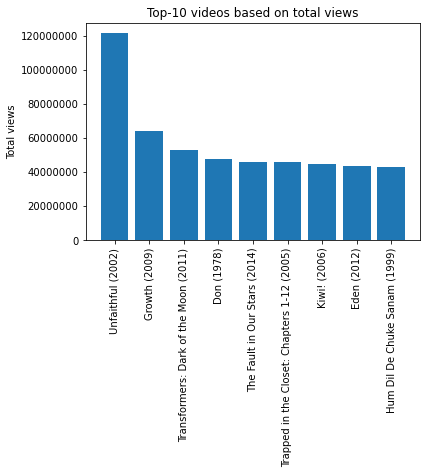

In [11]:
df_view = df_info.sort_values(by='view_count', ascending=False)

video_title = df_view['video_title'][:10].values
view_count = df_view['view_count'][:10].values

fig, ax = plt.subplots()
ax.bar(video_title, view_count)
ax.set_title('Top-10 videos based on total views')
ax.set_ylabel('Total views')
ax.ticklabel_format(style='plain', axis='y')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

## 3.2.  Using a bar diagram, show the bottom-10 videos based on total views

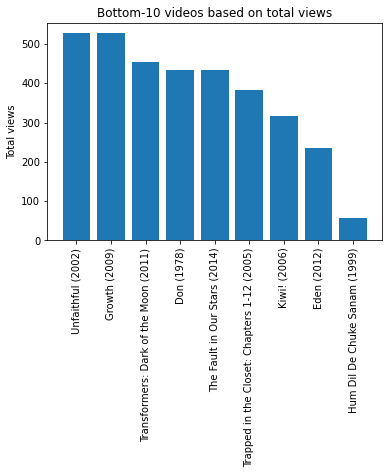

In [12]:
df_view = df_info.sort_values(by='view_count', ascending=False)
   
video_title = df_view['video_title'][:10].values
view_count = df_view['view_count'][-10:].values

fig, ax = plt.subplots()
ax.bar(video_title, view_count)
ax.set_title('Bottom-10 videos based on total views')
ax.set_ylabel('Total views')
ax.ticklabel_format(style='plain', axis='y')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

## 3.3.  Show the title of the video that has the most likes

In [13]:
index = df_info['like_count'].idxmax()
most_likes = df_info.iloc[index, -1]
print("{} is the video that has more likes.".format(most_likes))

The Fault in Our Stars (2014) is the video that has more likes.


## 3.4.  Show the title of the video that has the least likes

In [14]:
index = df_info['like_count'].idxmin()
least_likes = df_info.iloc[index, -1]
print("{} is the video that has less likes.".format(least_likes))

Monday Morning (Lundi matin) (2002) is the video that has less likes.


## 3.5.  Show the title of the video that has the highest duration

In [15]:
# Creating a function to convert ISO 8601 duration format to minutes
def get_time(time):
    time = isodate.parse_duration(time).total_seconds()
    total = round(time/60,1)
    return total

df_info['video_duration(min)'] = df_info['video_duration'].apply(lambda x: get_time(x))
df_info.head()

,video_id,video_description,view_count,like_count,dislike_count,comment_count,video_duration,favorite_count,video_title,video_duration(min)
0,rEnOoWs3FuA,"The more things change, the more they stay the same in Wabasha, Minnesota. The uncatchable fish named Catfish Hunter grows fatter. The wisecracks, zingers and put downs pile up like freshly raked leaves. And GRUMPY OLD MEN become grumpier in the sequel that's ""pure delight, a wonderfully warmhea...",160456,217,8,12,PT1M51S,0,Grumpier Old Men (1995),1.9
1,2GfZl4kuVNI,"Director: Michael Mann.\nCast: Al Pacino, Robert De Niro, Val Kilmer, Jon Voight, Tom Sizemore\nPlot: A Los Angeles crime saga, ""Heat"" focuses on the lives of two men on opposite sides of the law - one a detective; the other a thief.",1003586,4823,146,480,PT2M28S,0,Heat (1995),2.5
2,-C-xXZyX2zU,A preview for this 90s disney movie. From the Aristocats opening. Thanks to videos4everybody.,163590,162,16,79,PT1M,0,Tom and Huck (1995),1.0
3,lcOqUE0u1LM,"Release Date: November 13, 1995\n\nPierce Brosnan ignites the screen in his first adventure as the unstoppable James Bond. When a powerful satellite system falls into the hands of a former ally-turned-enemy, only 007 can save the world from an awesome space weapon that - in one short pulse - cou...",166422,721,23,88,PT2M52S,0,GoldenEye (1995),2.9
4,UrC75wUKoFM,"Subscribe to MovieTrailersByVD: http://bit.ly/QcNd7j\nMore clips, photos, and news: http://bit.ly/Udr8d9\n\nFollow Videodetective.com on facebook http://www.facebook.com/VideoDetective\nFollow Videodetective.com on twitter http://twitter.com/VideoDetective\n\nSubscribe to GameTrailersByVD: http:...",11169,16,2,1,PT2M50S,0,"American President, The (1995)",2.8


In [16]:
index = df_info['video_duration(min)'].idxmax()
longer_video = df_info.iloc[index, -2]
print("{} is the longest video.".format(longer_video))

Century of the Self, The (2002) is the longest video.


## 3.6. Using a bar diagram, show the top-10 videos that have the highest positive sentiment scores, which you calculated from the comments

In [17]:
# Importing required library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [18]:
# Function to get positive values
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['pos']

In [19]:
# Dropping null values and checking them again
df_comments.dropna(inplace=True)
df_comments.isna().sum()

video_id             0
all_comments_list    0
dtype: int64

In [20]:
df_comments['positive_sent'] = df_comments['all_comments_list'].apply(lambda x: sentiment_analyzer_scores(x))
df_comments

,video_id,all_comments_list,positive_sent
0,rEnOoWs3FuA,1:36 *GRUMPY⬅️ER* \n *GRUMPIER*,0.000
1,rEnOoWs3FuA,"I'm watching this now, it never gets old🤣",0.211
2,rEnOoWs3FuA,Canaloni !!!!,0.000
3,rEnOoWs3FuA,I was looking for halloween themed movies and stumbled over this... is there anything halloween related in this film?\n\n\nSeen it years ago but can't remember squat,0.000
4,rEnOoWs3FuA,"welp, been 3 years since anybody have commented",0.000
...,...,...,...
266384,5NQ_9OYmovo,"HOW the camera, at one shot, entered from a hole in the door, then got out of it? I watched the movie since 30 years, and I'm still asking the same question??",0.000
266385,5NQ_9OYmovo,"Still happens today. Iowa Authorities labeled me as a “ Sovereign Citizen” And Fabricated Pretend Offenses, Withheld Exonerating Exculpatory Evidence And Planted the Juries. You Tube: Iowa Corrupt Judges Courts Police http://www.youtube.com/user/KornKobIowa",0.057
266386,5NQ_9OYmovo,"Still happens today. Iowa Authorities labeled me as a “ Sovereign Citizen” And Fabricated Pretend Offenses, Withheld Exonerating Exculpatory Evidence And Planted the Juries. You Tube: Iowa Corrupt Judges Courts Police http://www.youtube.com/user/KornKobIowa",0.057
266387,tDcvstelTmk,©1994 Metro-Goldwyn-Mayer Studios Inc. and Warner Bros. Entertainment Inc.\nTOM AND JERRY and all related characters and elements are trademarks of & © Turner Entertainment Co. & Warner Bros. Entertainment Inc.\nElvis Presley songs courtesy of Sony Music Entertainment and Elvis Presley Enterpris...,0.248


In [21]:
# Creating a new column using the mean of all positive comments each video received
videos_list = df_info['video_id'].values
count_list = []
for video in tq(videos_list):
    df_temp = df_comments[df_comments['video_id']==video]
    mean = round(df_temp['positive_sent'].mean(), 4)
    count_list.append(mean)

100%|██████████| 14239/14239 [04:25<00:00, 53.53it/s]


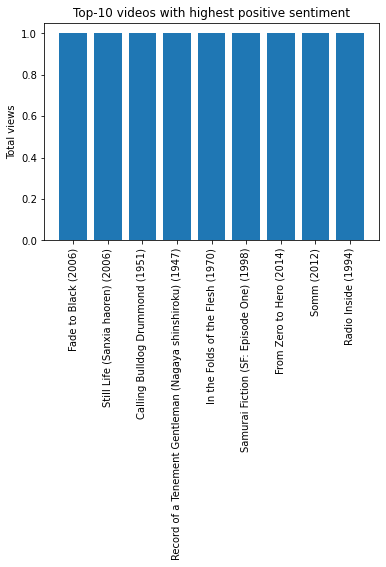

In [22]:
df_info['positive_sent'] = count_list
df_positive = df_info.sort_values(by='positive_sent', ascending=False)

video_title = df_positive['video_title'][:10].values
positive_sent = df_positive['positive_sent'][:10].values

fig, ax = plt.subplots()
ax.bar(video_title, positive_sent)
ax.set_title('Top-10 videos with highest positive sentiment')
ax.set_ylabel('Total views')
ax.ticklabel_format(style='plain', axis='y')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

In [23]:
# importing required libraries
import spacy
import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import en_core_web_md
import unicodedata
nltk.download('all')

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
nlp = en_core_web_md.load()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\JonatasDeve\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\JonatasDeve\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\JonatasDeve\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\JonatasDeve\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\JonatasDeve\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[

[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     C:\Users\JonatasDeve\AppData\Roaming\nltk_data...
[nltk_data]    |   Package subjectivity is already up-to-date!
[nltk_data]    | Downloading package swadesh to
[nltk_data]    |     C:\Users\JonatasDeve\AppData\Roaming\nltk_data...
[nltk_data]    |   Package swadesh is already up-to-date!
[nltk_data]    | Downloading package switchboard to
[nltk_data]    |     C:\Users\JonatasDeve\AppData\Roaming\nltk_data...
[nltk_data]    |   Package switchboard is already up-to-date!
[nltk_data]    | Downloading package timit to
[nltk_data]    |     C:\Users\JonatasDeve\AppData\Roaming\nltk_data...
[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     C:\Users\JonatasDeve\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package tree

In [24]:
# Function to clean comments 
import re
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


def normalize_corpus(corpus, accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    doc = corpus
    # accented characters removal
    if accented_char_removal:
        doc = remove_accented_chars(doc)
    
    # lowercase text
    if text_lower_case:
        doc = doc.lower()
    
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
    
    # lemmatize text
    if text_lemmatization:
        doc = lemmatize_text(doc)
    
    # remove special characters and\or digits    
    if special_char_removal:
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        doc = remove_special_characters(doc, remove_digits=remove_digits)  
    
    # remove extra whitespace
    doc = re.sub(' +', ' ', doc)
    
    # remove stopwords
    if stopword_removal:
        doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        
    return doc


def clean_comments(text):
  # removing words starting with @ or #
  doc = re.sub(r'@[a-zA-Z0-9]+', "", text)
  doc = re.sub(r'#[a-zA-Z0-9]+', "", doc)
  doc = re.sub(r'https://t.co/[a-zA-Z0-9]+', '', doc, flags=re.MULTILINE)
  doc = re.sub(r'[\W_]', ' ', doc) # removing underscores
  doc = re.sub(r'(http(s:|:)\/\/)(www.|WWW.)+([0-9a-z.A-Z-]\.\w{2,3})', '', doc, flags=re.MULTILINE)
  doc = normalize_corpus(doc, text_lemmatization=False)
  return doc

In [25]:
df_comments_new = df_comments.copy()

In [26]:
df_comments_new['cleaned_comments'] = df_comments_new['all_comments_list'].apply(lambda x: clean_comments(x))
df_comments_new

,video_id,all_comments_list,positive_sent,cleaned_comments
0,rEnOoWs3FuA,1:36 *GRUMPY⬅️ER* \n *GRUMPIER*,0.000,grumpy er grumpier
1,rEnOoWs3FuA,"I'm watching this now, it never gets old🤣",0.211,watching never gets old
2,rEnOoWs3FuA,Canaloni !!!!,0.000,canaloni
3,rEnOoWs3FuA,I was looking for halloween themed movies and stumbled over this... is there anything halloween related in this film?\n\n\nSeen it years ago but can't remember squat,0.000,looking halloween themed movies stumbled anything halloween related film seen years ago remember squat
4,rEnOoWs3FuA,"welp, been 3 years since anybody have commented",0.000,welp years since anybody commented
...,...,...,...,...
266384,5NQ_9OYmovo,"HOW the camera, at one shot, entered from a hole in the door, then got out of it? I watched the movie since 30 years, and I'm still asking the same question??",0.000,camera one shot entered hole door got watched movie since years still asking question
266385,5NQ_9OYmovo,"Still happens today. Iowa Authorities labeled me as a “ Sovereign Citizen” And Fabricated Pretend Offenses, Withheld Exonerating Exculpatory Evidence And Planted the Juries. You Tube: Iowa Corrupt Judges Courts Police http://www.youtube.com/user/KornKobIowa",0.057,still happens today iowa authorities labeled sovereign citizen fabricated pretend offenses withheld exonerating exculpatory evidence planted juries tube iowa corrupt judges courts police http www youtube com user kornkobiowa
266386,5NQ_9OYmovo,"Still happens today. Iowa Authorities labeled me as a “ Sovereign Citizen” And Fabricated Pretend Offenses, Withheld Exonerating Exculpatory Evidence And Planted the Juries. You Tube: Iowa Corrupt Judges Courts Police http://www.youtube.com/user/KornKobIowa",0.057,still happens today iowa authorities labeled sovereign citizen fabricated pretend offenses withheld exonerating exculpatory evidence planted juries tube iowa corrupt judges courts police http www youtube com user kornkobiowa
266387,tDcvstelTmk,©1994 Metro-Goldwyn-Mayer Studios Inc. and Warner Bros. Entertainment Inc.\nTOM AND JERRY and all related characters and elements are trademarks of & © Turner Entertainment Co. & Warner Bros. Entertainment Inc.\nElvis Presley songs courtesy of Sony Music Entertainment and Elvis Presley Enterpris...,0.248,metro goldwyn mayer studios inc warner bros entertainment inc tom jerry related characters elements trademarks turner entertainment co warner bros entertainment inc elvis presley songs courtesy sony music entertainment elvis presley enterprises llc metro goldwyn mayer studios inc mgm holdings wa...


In [27]:
df_comments_new['positive_sent_2'] = df_comments_new['cleaned_comments'].apply(lambda x: sentiment_analyzer_scores(x))
df_comments_new

,video_id,all_comments_list,positive_sent,cleaned_comments,positive_sent_2
0,rEnOoWs3FuA,1:36 *GRUMPY⬅️ER* \n *GRUMPIER*,0.000,grumpy er grumpier,0.000
1,rEnOoWs3FuA,"I'm watching this now, it never gets old🤣",0.211,watching never gets old,0.000
2,rEnOoWs3FuA,Canaloni !!!!,0.000,canaloni,0.000
3,rEnOoWs3FuA,I was looking for halloween themed movies and stumbled over this... is there anything halloween related in this film?\n\n\nSeen it years ago but can't remember squat,0.000,looking halloween themed movies stumbled anything halloween related film seen years ago remember squat,0.000
4,rEnOoWs3FuA,"welp, been 3 years since anybody have commented",0.000,welp years since anybody commented,0.000
...,...,...,...,...,...
266384,5NQ_9OYmovo,"HOW the camera, at one shot, entered from a hole in the door, then got out of it? I watched the movie since 30 years, and I'm still asking the same question??",0.000,camera one shot entered hole door got watched movie since years still asking question,0.000
266385,5NQ_9OYmovo,"Still happens today. Iowa Authorities labeled me as a “ Sovereign Citizen” And Fabricated Pretend Offenses, Withheld Exonerating Exculpatory Evidence And Planted the Juries. You Tube: Iowa Corrupt Judges Courts Police http://www.youtube.com/user/KornKobIowa",0.057,still happens today iowa authorities labeled sovereign citizen fabricated pretend offenses withheld exonerating exculpatory evidence planted juries tube iowa corrupt judges courts police http www youtube com user kornkobiowa,0.063
266386,5NQ_9OYmovo,"Still happens today. Iowa Authorities labeled me as a “ Sovereign Citizen” And Fabricated Pretend Offenses, Withheld Exonerating Exculpatory Evidence And Planted the Juries. You Tube: Iowa Corrupt Judges Courts Police http://www.youtube.com/user/KornKobIowa",0.057,still happens today iowa authorities labeled sovereign citizen fabricated pretend offenses withheld exonerating exculpatory evidence planted juries tube iowa corrupt judges courts police http www youtube com user kornkobiowa,0.063
266387,tDcvstelTmk,©1994 Metro-Goldwyn-Mayer Studios Inc. and Warner Bros. Entertainment Inc.\nTOM AND JERRY and all related characters and elements are trademarks of & © Turner Entertainment Co. & Warner Bros. Entertainment Inc.\nElvis Presley songs courtesy of Sony Music Entertainment and Elvis Presley Enterpris...,0.248,metro goldwyn mayer studios inc warner bros entertainment inc tom jerry related characters elements trademarks turner entertainment co warner bros entertainment inc elvis presley songs courtesy sony music entertainment elvis presley enterprises llc metro goldwyn mayer studios inc mgm holdings wa...,0.297


In [28]:
# Creating a new column using the mean of all positive comments each video received
videos_list = df_info['video_id'].values
count_list = []
for video in tq(videos_list):
    df_temp = df_comments_new[df_comments_new['video_id']==video]
    mean = round(df_temp['positive_sent_2'].mean(), 4)
    count_list.append(mean)

100%|██████████| 14239/14239 [05:02<00:00, 47.03it/s]


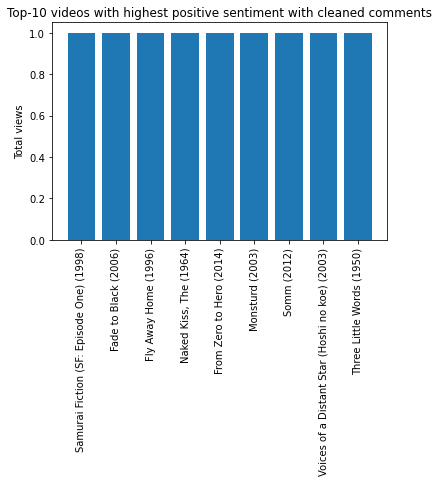

In [29]:
df_info['positive_sent_2'] = count_list
df_positive_2 = df_info.sort_values(by='positive_sent_2', ascending=False)

video_title = df_positive_2['video_title'][:10].values
positive_sent_2 = df_positive_2['positive_sent_2'][:10].values

fig, ax = plt.subplots()
ax.bar(video_title, positive_sent_2)
ax.set_title('Top-10 videos with highest positive sentiment with cleaned comments')
ax.set_ylabel('Total views')
ax.ticklabel_format(style='plain', axis='y')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()